#Milestone1

Stephanie Eordanidis.
Ravjot Sachdev,
Jackson Taber

Syracuse University : College of Engineering & Computer Science

223 Link Hall, Syracuse, NY 13244

*sleordan@syr.edu, rsachdev@syr.edu, jtaber@syr.edu*

CIS 700 Machine Learning and Security

04/21/2021


##Theme:
 “Adversarial Text Generation: Adversarial Machine Learning Applications in Text Analysis”

##Purpose:
The purpose of this lab is to confirm project selection (from an existing project as a baseline) under the topic of selected theme and to make sure that the selected project is understood and runnable.

##Project:
Texygen is the name of the project selected. This project is a benchmarking tool that aids in text generation model research and testing. This tool allows for ease of various model testing to compare accuracy and synthetic data generation of models using same training baseline.

##(Hard/Soft)ware:
**Google Colaboratory**		https://colab.research.google.com/

**GPU**                     Python 3 Google Compute Engine backend

**Github**                  https://github.com/eordanis/CIS-700/tree/main/Project/Milestone1/Milestone1_no_data

##Resources:
**Original Source:** 		https://github.com/geek-ai/Texygen

**Modified Sources Acquired:** 	2SU Course Files Section -> Texygenmaster_Python_3.6.zip

##Data:
The data for the selected project is setup as follows:

•	Generated data training: 5000 word and 20 sentence count

•	Oracle data generation: 10,000 sentence generation

•	Real data training: 20,000 sentences chosen from the image COCO captions data. 10,000 of which are used as training set while other 10,000 used as test set

*   Secondaly real data training set from kaggle. https://www.kaggle.com/datatattle/covid-19-nlp-text-classification

##Modifications:
To begin, the modified source code acquired from the 2SU application was further modified to combine the original intention of the origin source authors as well as professor modification. If no arguments are passed, all models/data are run. Note, the order or model generation is done by first iterating over the GAN model type, then data type. If arguments are passed, those arguments will be validated and run accordingly to run a more targeted model test. Addition modifications were applied to eliminate much library warnings and informational messages as to keep output as clean as possible. Furthermore, file path naming was updated to be compliant with Google Colaboratory environment. All epoch time elapse console printing has been commented out for cleaner output reading.

##Setup:
Due to the heft of processor/gpu usage, it was deemed necessary to run the project in the Google Colaboratory. Original attempt to run was done via Pycharm IDE Professional Edition with Anaconda derived environments, however this proved too great of a strain on the accessible workstation.



###Step 1
A new Google Colaboratory workspace was setup, titled “Assignment 1”. This workspace was run using the hosted runtime environment. This document is the current document being read.

In order to run against provided code base, it was necessary to mount the google drive space to this workbook. The following command accomplished this:

```
            from google.colab import drive
            drive.mount('/content/drive')
```

Running this command from the first cell in the workbook mounted the drive, making all drive content accessible.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

###Step 2
Now it was necessary to import and download any missing libraries the hosted colaborartoy runtime did not have readily available via the following commands:
```
            !pip install -r "/content/drive/MyDrive/CIS-700/Texygen-master_Python_3.6/
            Texygen-master/requirements.txt"
            import nltk
            nltk.download('punkt')
```
Running this command from the next cell in the workbook installed the necessary libraries and at specified versions for the project.


In [ ]:
!pip install -r "/content/drive/MyDrive/CIS-700/Texygen-master_Python_3.6/Texygen-master/requirements.txt"
import nltk
nltk.download('punkt')

###Step 3

Updating the file path references in the model files was now required. In all model directory .py files that contained file path references, it was necessary to update the paths to include the drive path portion. A variable called “basePath” was created and appended to the top of all relevant files for ease of path updating.

An example of use would be under the various model init as shown below:

```
basePath = '/content/drive/MyDrive/CIS-700/Texygen-master_Python_3.6/Texygen-master/'
...
self.oracle_file = basePath + 'models/mle/save/oracle.txt'
self.generator_file = basePath + 'models/mle/save/generator.txt'
self.test_file = basePath + 'models/mle/save/test_file.txt'

```

###Step 4
Now it is time to run the application. Below are two examples of commands to run the application.
```
!python3 "/content/drive/MyDrive/CIS-700/Texygen-master_Python_3.6/Texygen-master/main.py"
```
This first command was run without parameters. In the case of this command, all trainings (SeqGAN, Gsgan, TextganMmd, Leakgan, Rankgan, Maligan, Mle) were run on all available defaulted training data (oracle LSTM, image_coco, CFG). Running this command can take around 2+ hours to complete.

```
!python3 "/content/drive/MyDrive/CIS-700/Texygen-master_Python_3.6/Texygen-master/main.py"
-g seqgan -t real
```

This second command was run with parameters. In the case of this command, main was run with SeqGAN training on image_coco. Running targeted trainings take less time to run, on average completing in 5-15 minutes depending on selected parameters. With the above selection, runtime was run above 10 minutes.

**NOTE:** For above estimates, based around 5 epochs. Additionally, CFG training appears to have stopped working suddently, unsure why broken. Therefore running without that option for the time being. Additionally, the LeakGan model failed entirely to run now due to flag errors, so this model was discarded from testing.


##Process

When running the various models, there are similar steps for each.
1.	Beginning Training – begin model training(s)
2.	Set training - sets the desired model training method
3.	Start model pre-train generator – uses the training data to pre-train the generator model
4.	Start model pre-train discriminator - – uses the training data to pre-train the discriminator model
5.	Model adversarial training – runs the model to generate results based on the test data and metrics applied
6.	Finish Training – end of model training(s)

During training, each model training runs through several passes or epochs. For simplicity, base epoch is set to 5, with model training running thrice for 15 total epochs there abouts for each model trained on a particular data set.


##Metrics

**Abbreviations:**
*   BLEU 	- BiLingual Evaluation Understudy
*   GAN 	- Generative Adversarial Network
*   NLL 	- Negative Log-Likelihood
*   RL	- Reinforcement Learning

**Definitions**
*   EmbSim – influenced by BLEU, used instead to compare the word embeddings vs BLEU’s comparison of word similarity between two sentences or documents.
*   NLL-oracle : applied to synthetic data to determine fitting via oracle language model standards.
*   NLL-test : dual to NLL-Oracle, used to determine a model’s capability to fit to real test data

These measurement standards and more are discussed In the project directory’s “/docs/evaluation.md” location.


##Models
For this report, the TextGAN and SeqGAN models were run on oracle and real training types. The real training types essentially runs the data against the image_coco.txt caption data. The TextGAN and SeqGAN was developed by the source project team to improve on existing GAN networks.

With regards to TextGan, the goal of this model is to generate high quality realistic synthetic data while overcoming the convergence dilemma by using a generator that runs as a long short-term memory network and its discriminator a convolutional network. By matching high-dimension laten feature distributions of the testing and training data, this model over longer epochs has shown demonstrate a higher performance in quantitative evaluation, showing the TextGAN model can produce sentences that appear to have been written by a human, and not AI generated.

For the SeqGAN model, this also proved successful in generating realistic looking sentences via this generator process. A second model was selected for comparison purposes. SeqGAN’s generator is based off the reinforcement learning stochastic policy, allowing SeqGAN to performing gradient policy update in order to circumvent differentiation issues in the generation. Its discriminator is run on complete sentences, and its results used as the reinforcement learning reward signal. According to source authors, this model boasted higher performance over others run.


##Testing

Epochs were increased to 45, as according to original project sourcing, this model displays the best NLL loss results on epochs > 40, prior to that point results would be poorer. NLL loss values are indicated to be better the lower they are, so if these values trend downward, the models are improving. For EmbeddedSimilarity, higher values are desired for better results.

###TextGAN
The following commands are to run TextGAN model on both oracle and real trainings.

**NOTE:** The real data essentially trained the model on the image_coco.txt data.
```
!python3 "/content/drive/MyDrive/CIS-700/Texygen-master_Python_3.6/Texygen-master/main.py"
-g textgan -t oracle
!python3 "/content/drive/MyDrive/CIS-700/Texygen-master_Python_3.6/Texygen-master/main.py"
-g textgan -t real
```

In [ ]:
!python3 "/content/drive/MyDrive/CIS-700/Texygen-master_Python_3.6/Texygen-master/main.py" -g textgan -t oracle

####Oracle Output
As we can see from the output above, over several loopthroughs, or epochs, the accuracy of the nll oracle and test values increase when running TextGAN with oracle training. Additionally, it is noted the embedded similarity is improving as well.
For training, it appeared epoch 41 and uppward appeared to host the best accuracy across the metric measurements.

**Best Values**

*   NLL-oracle:             5.777181              @epoch 46
*   NLL-test:               7.509662              @epoch 41
*   EmbeddingSimilarity:    -0.12762986245437238  @epoch 66





In [ ]:
!python3 "/content/drive/MyDrive/CIS-700/Texygen-master_Python_3.6/Texygen-master/main.py" -g textgan -t real

####Real Output
As we can see from the output above, over several loopthroughs, or epochs, the accuracy of the nll values are also increase when running TextGAN with real training. Additionally, it is noted the embedded similarity is improving as well. This indicates to us that the test_text.txt data generated should have closer similarity to the original image_coco.txt data file used to train the models.

For training, it appeared epoch 41 and uppward appeared to host the best accuracy across the metric measurements.

**Best Values**

*   NLL-test:               1.3581977              @epoch 41
*   EmbeddingSimilarity:    -0.014001833940874337  @epoch 41

###SeqGAN
The following commands are to run SeqGAN model on both oracle and real trainings.

**NOTE:** The real data essentially trained the model on the image_coco.txt data.
```
!python3 "/content/drive/MyDrive/CIS-700/Texygen-master_Python_3.6/Texygen-master/main.py"
-g seqgan -t oracle
!python3 "/content/drive/MyDrive/CIS-700/Texygen-master_Python_3.6/Texygen-master/main.py"
-g seqgan -t real
```

In [ ]:
!python3 "/content/drive/MyDrive/CIS-700/Texygen-master_Python_3.6/Texygen-master/main.py" -g seqgan -t oracle

####Oracle Output
As we can see from the output above, over several loopthroughs, or epochs, the accuracy of the nll oracle and test values increase when running SeqGAN with oracle training. Additionally, it is noted the embedded similarity is improving as well.

For training, it appeared epoch 41 and uppward appeared to host the best accuracy across the metric measurements.

**Best Values**

*   NLL-oracle:             9.557                 @epoch 76
*   NLL-test:               6.2061586             @epoch 46
*   EmbeddingSimilarity:    -0.19595497081875352  @epoch 76

In [ ]:
!python3 "/content/drive/MyDrive/CIS-700/Texygen-master_Python_3.6/Texygen-master/main.py" -g seqgan -t real

####Real Output
As we can see from the output above, over several loopthroughs, or epochs, the accuracy of the nll values are also increase when running SeqGAN with real training. Additionally, it is noted the embedded similarity is improving as well. This indicates to us that the test_text.txt data generated should have closer similarity to the original image_coco.txt data file used to train the models.

For training, it appeared epoch 41 and uppward appeared to host the best accuracy across the metric measurements.

**Best Values**

*   NLL-test:               0.7961004	           @epoch 41
*   EmbeddingSimilarity:    -0.011646909450698437  @epoch 31

###Data Comparision
####Oracle Data
Model comparison wise, TextGAN performed better than SeqGAN using a base of 45 epochs and under the testing done at this time. It would seem that using the TextGAN model is superior to the SeqGAN model using these qualifying metrics. To see the best results under the SeqGAN model, it woul require an average of 46:76 epoch to achieve vs the 41:66 for TextGAN.

**TextGAN Best Values**

*   NLL-oracle:             5.777181              @epoch 46
*   NLL-test:               7.509662              @epoch 41
*   EmbeddingSimilarity:    -0.12762986245437238  @epoch 66

**SeqGAN Best Values**

*   NLL-oracle:             9.557                 @epoch 76
*   NLL-test:               6.2061586             @epoch 46
*   EmbeddingSimilarity:    -0.19595497081875352  @epoch 76

####Real Data
When comparing real data metrics between the two models, the results show SeqGAN to generate better values. Again, both models are running metrics on the real data with a base of 45 epoch.

**TextGAN Best Values**

*   NLL-test:               1.3581977              @epoch 41
*   EmbeddingSimilarity:    -0.014001833940874337  @epoch

**SeqGAN Best Values**

*   NLL-test:               0.7961004	           @epoch 41
*   EmbeddingSimilarity:    -0.011646909450698437  @epoch 31

Here we will take a look at the first 15 lines of the real data files, both training/test [image_coco.txt / test_coco.txt] and synthetic data genration from the model labeled test_file.txt

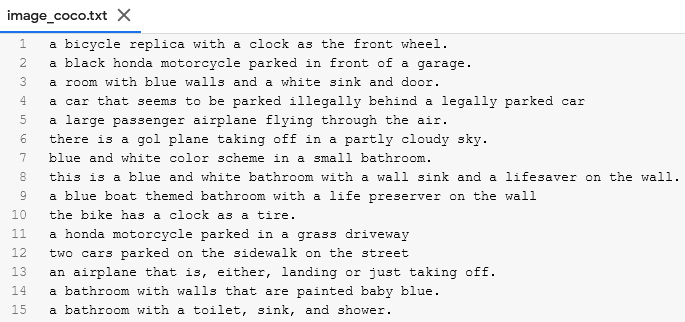

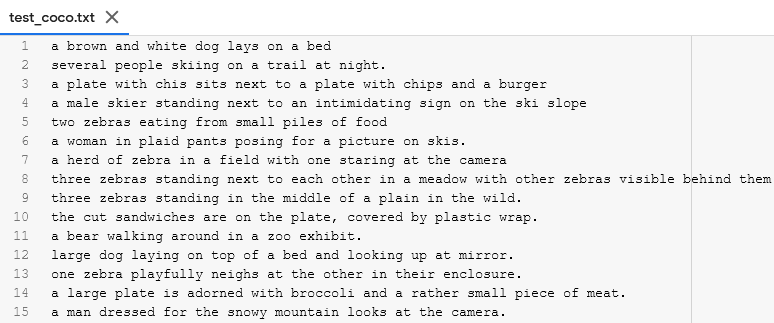

This figure is representative of the TextGAN test_file.txt file. Although the sentence structures appear lacking, the sentence formulation was well developed. if you compare the full synthetic sentences, they appear derived from line 15 of the image_coco.txt document.

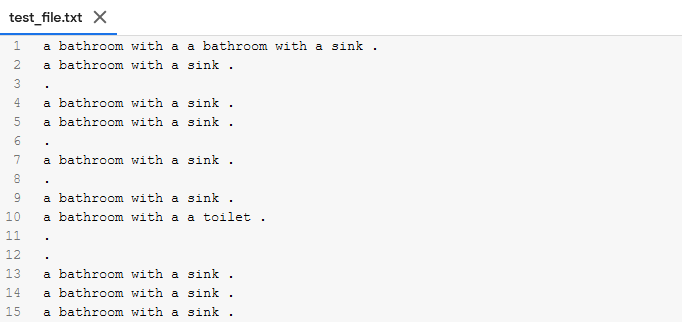

Lastly this figure is representative of the SeqGAN test_file.txt file. Although the sentence structures can appear a little lacking, the sentence formulation was well developed. If you compare the full synthetic sentences, they appear similar in nature to image_coco.txt document.

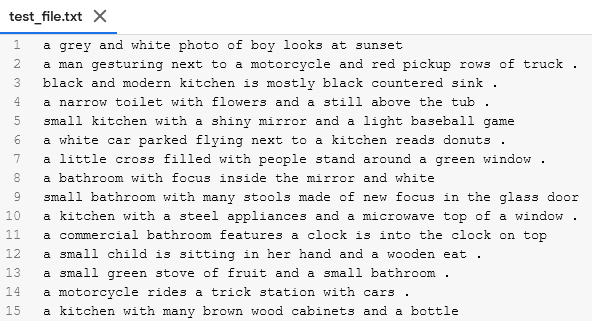

##Notes
This was an interesting project to run and work in. Given the short duration of setup, running, etc there was not sufficient time to truely understand each of the models under the project. 2 model were selected for study, however even these would require more than a week for all encompasing tasking to really dive in and understand. Additionally it should be noted the amount of time it takes to run these models with higher epoch values. Running the full models over and over can help training, however can take hours to complete. Furthermore, the .csv files were not populating. Given more time dedicate to this project, issues may have been able to be resolved

##Reference
[1] Geek-Ai. “Texygen by Geek.AI.” GitHub, 2017, github.com/geek-ai/Texygen.

[2] Yu, Lantao, et al. “SeqGAN: Sequence Generative Adversarial Nets with Policy Gradient.” ArXiv.org, 25 Aug. 2017, arxiv.org/abs/1609.05473.

[3] Zhang, Yizhe, et al. “Adversarial Feature Matching for Text Generation.” ArXiv.org, 18 Nov. 2017, arxiv.org/abs/1706.03850.

[4] Kaggle.  https://www.kaggle.com/datatattle/covid-19-nlp-text-classification

In [ ]:
#PDF/HTML conversion of notebook
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
!jupyter nbconvert --to PDF "Milestone1.ipynb"
!jupyter nbconvert --to HTML "Milestone1.ipynb"